# Lending Club Case Study

## Steps


- Step 1: Define the Problem and Set Objectives
- Step 2: Load the Data and basic investigation
- Step 3: Data Understanding
- Step 4: Data Cleaning
- Step 5: Handling Outliers and missing values
- Step 6: Feature Engineering
- Step 7: Univariate Analysis
- Step 8: Bivariate Analysis
- Step 9: Identify Important Driver Variables
- Step 10: Summarize Insights and Recommendations
- Step 11: Presentation and Documentation


### Step 1: Define the Problem and Set Objectives.
1. **Objective**: Identify patterns in loan applicants that lead to loan defaults using Exploratory Data Analysis (EDA). This will help the company minimize risk by identifying high-risk loan applicants.
2. **Business Problem**: The company faces two risks when deciding on a loan:
    - If a reliable applicant is rejected, the company loses potential business.
    - If a risky applicant is accepted, the company risks financial loss due to defaults.
3. **Data Overview**: The provided loan dataset contains historical data on loans issued between 2007 and 2011, detailing whether the applicant defaulted or repaid the loan.


### Step 2: Load the Data and basic investigation


In [2]:
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Load the Dataset

In [6]:
loan_data = pd.read_csv("loan.csv")

#### 2.2 Check Dataset Overview

In [7]:
loan_data.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Observations from the Data Loading:
1. **Data Structure**:
   - The dataset contains 39,717 rows and 111 columns.
   - Data types include `float64` (74 columns), `int64` (13 columns), and `object` (24 columns).


2. **Missing Data**:
    - Several columns have missing values, as shown by the `count` in the summary statistics.
    - Some columns like `num_tl_op_past_12m`, `pct_tl_nvr_dlq`, and `percent_bc_gt_75` have no valid data at all.
    - Columns with extensive missing values might be dropped or imputed, depending on their relevance.

3. **Key Numerical Statistics**:
    - For columns like `loan_amnt`, `annual_inc`, and `installment`, the summary statistics provide insights into their distributions (e.g., the mean loan amount is approximately 9,234, with a maximum of 35,000).
  
      
4. **Potential Data Quality Issues**:
    - Some columns (like `int_rate`) are stored as strings and may require cleaning before analysis (e.g., converting percentages to numerical values).

### Step 3: Data Understanding

#### 3.1 Inspect Column Types and Missing Values
- Identify which columns have missing data and which need data type conversions (e.g., percentages or categorical data).

In [24]:
# Check for missing values across the dataset
missing_data = loan_data.isnull().sum().sort_values(ascending=False)

In [25]:
missing_data.head(20)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
open_rv_24m                  39717
open_rv_12m                  39717
il_util                      39717
total_bal_il                 39717
mths_since_rcnt_il           39717
open_il_24m                  39717
dtype: int64

In [22]:
missing_data.info()

<class 'pandas.core.series.Series'>
Index: 111 entries, id to total_il_high_credit_limit
Series name: None
Non-Null Count  Dtype
--------------  -----
111 non-null    int64
dtypes: int64(1)
memory usage: 5.8+ KB


- Several columns have extensive missing values. For example, columns like `verification_status_joint`, `annual_inc_joint`, and `mo_sin_old_rev_tl_op` have no valid data in the dataset (all values are missing).
- These columns may need to be removed or further explored to decide if they are relevant for analysis.

#### 3.2 Data Types(Numerical vs Categorical Columns)



In [26]:
numerical_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns

In [27]:
numerical_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    

In [31]:
len(numerical_cols)

87

In [28]:
categorical_cols = loan_data.select_dtypes(include=['object']).columns

In [29]:
categorical_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [32]:
len(categorical_cols)

24

- There are 87 numerical columns and 24 categorical columns.
- The numerical columns include key features like `loan_amnt`, `funded_amnt`, `annual_inc`, and `total_pymnt`.
- The categorical columns include `term`, `int_rate`, `grade`, `loan_status`, and `home_ownership`, which will be critical for segmenting the data.

#### Key Columns:

- Loan Amount:

In [34]:
loan_amnt_stats = loan_data['loan_amnt'].describe() 
loan_amnt_stats

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

    - The loan amounts range from 500 to 35,000.
    - The average loan amount is around 11,219, with a median of 10,000.

- Interest Rates:

In [35]:
int_rate_unique = loan_data['int_rate'].unique()
int_rate_unique

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

    - Interest rates are stored as percentages (e.g., '10.65%', '15.27%'). These will need to be converted to numeric for analysis.

- Loan Status:

In [37]:
loan_status_counts = loan_data['loan_status'].value_counts()
loan_status_counts

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

    - Most loans in the dataset are classified as Fully Paid (32,950), while 5,627 loans were Charged Off (defaults), and 1,140 are still Current.
    - This indicates the dataset is imbalanced, with a majority of loans being fully paid or the company approved right customers.

- Loan Grades:

In [38]:
grade_counts = loan_data['grade'].value_counts()
grade_counts

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

    - Loans are assigned grades from A to G. Most loans fall into the B and A categories, while fewer loans are assigned lower grades like F and G.
    - Loan grades will likely be a significant factor in determining default risk.

##### There are several other key columns that could provide valuable insights into loan defaults

- `dti` (Debt-to-Income Ratio):
    - This represents the ratio of the borrower's monthly debt payments to their monthly income. A high DTI ratio might be an indicator of a higher risk of default.
- `annual_inc` (Annual Income):
    - Understanding how a borrower’s income impacts their ability to repay loans could provide insights into default risk.
- `emp_length` (Employment Length):
    - Longer employment may suggest a more stable financial situation, reducing the likelihood of default.
- `home_ownership`:
    - The type of home ownership (e.g., Rent, Mortgage, Own) may influence the borrower’s financial stability.
- `purpose`:
    - The purpose of the loan (e.g., debt consolidation, credit card, home improvement) may affect default risk. Loans for riskier purposes like debt consolidation might have higher default rates.
- `revol_util` (Revolving Line Utilization Rate):
    - This measures the borrower’s credit card utilization rate. Higher utilization may indicate higher financial stress, increasing default risk.
- `earliest_cr_line` (Earliest Credit Line):
    - This represents the date the borrower’s oldest credit line was opened. A longer credit history may indicate better creditworthiness.
- `installment`:
    - This is the monthly payment amount. Higher monthly installments relative to income could increase the risk of default.
- `delinq_2yrs`:
    - The number of times the borrower has been delinquent in the past two years. A history of delinquencies could be a strong predictor of default.


### Step 4: Data Cleaning

#### 4.1 Handle Missing Data:
- We can either drop columns with excessive missing data or impute values where appropriate (e.g., filling missing values with mean/median).
- Drop columns that have no meaningful data and handle those with some missing values by imputation.

In [52]:
# Drop columns with excessive missing values
# We can set a threshold for how many missing values to tolerate (e.g., drop columns with over 50% missing)
loan_data_clean1 = loan_data.dropna(thresh=len(loan_data) * 0.5, axis=1)
loan_data_clean1.shape, loan_data.shape

((39717, 54), (39717, 111))

In [56]:
number_of_droped_columns_4_1_1 = loan_data.shape[1] - loan_data_clean1.shape[1]
number_of_droped_columns_4_1_1

57

In [62]:
loan_data_clean2 = loan_data_clean1.drop(columns=['id', 'member_id', 'url', 'desc'])
loan_data_clean2.shape, loan_data_clean1.shape

((39717, 50), (39717, 54))

In [63]:
number_of_droped_columns_4_1_2 = loan_data_clean1.shape[1] - loan_data_clean2.shape[1]
number_of_droped_columns_4_1_2

4

In [73]:
loan_data_clean = loan_data_clean2

In [74]:
numeric_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns
loan_data_clean[numeric_cols] = loan_data_clean[numeric_cols].fillna(loan_data_clean[numeric_cols].median())


In [75]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

#### 4.2 Missing Data:
- Remaining columns with missing data:
    - emp_title
    - emp_length
    - title
    - revol_util
    - last_pymnt_d
    - last_credit_pull_d

<br />
These columns should be further reviewed to decide on imputations or removals, depending on their relevance.


#### 4.3 Data Type Conversions:

In [76]:
loan_data_clean['int_rate'] = loan_data_clean['int_rate'].str.replace('%', '').astype(float)

In [77]:
loan_data_clean['term'] = loan_data_clean['term'].apply(lambda x: int(x.split()[0]))

In [78]:
loan_data_clean['grade'] = loan_data_clean['grade'].astype('category')

In [79]:
loan_data_clean['loan_status'] = loan_data_clean['loan_status'].astype('category')

- The `int_rate` column was successfully converted from a string to a float.
- Columns like `term`, `grade`, and `loan_status` were converted to appropriate types (integer or category).

In [81]:
cleaned_data_info = loan_data_clean.info()
cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   39717 non-null  int64   
 1   funded_amnt                 39717 non-null  int64   
 2   funded_amnt_inv             39717 non-null  float64 
 3   term                        39717 non-null  int64   
 4   int_rate                    39717 non-null  float64 
 5   installment                 39717 non-null  float64 
 6   grade                       39717 non-null  category
 7   sub_grade                   39717 non-null  object  
 8   emp_title                   37258 non-null  object  
 9   emp_length                  38642 non-null  object  
 10  home_ownership              39717 non-null  object  
 11  annual_inc                  39717 non-null  float64 
 12  verification_status         39717 non-null  object  
 13  issue_d         

In [82]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

emp_title              2459
emp_length             1075
last_pymnt_d             71
revol_util               50
title                    11
last_credit_pull_d        2
recoveries                0
initial_list_status       0
out_prncp                 0
out_prncp_inv             0
dtype: int64

In [83]:
loan_data_clean = loan_data_clean.drop(columns=['emp_title', 'emp_length'])

In [84]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

last_pymnt_d           71
revol_util             50
title                  11
last_credit_pull_d      2
loan_amnt               0
total_rec_late_fee      0
initial_list_status     0
out_prncp               0
out_prncp_inv           0
total_pymnt             0
dtype: int64

### Step 5: Handling Outliers

Using visualization techniques like box plots and histograms to spot outliers in key numeric columns such as loan_amnt, int_rate, annual_inc, and dti

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

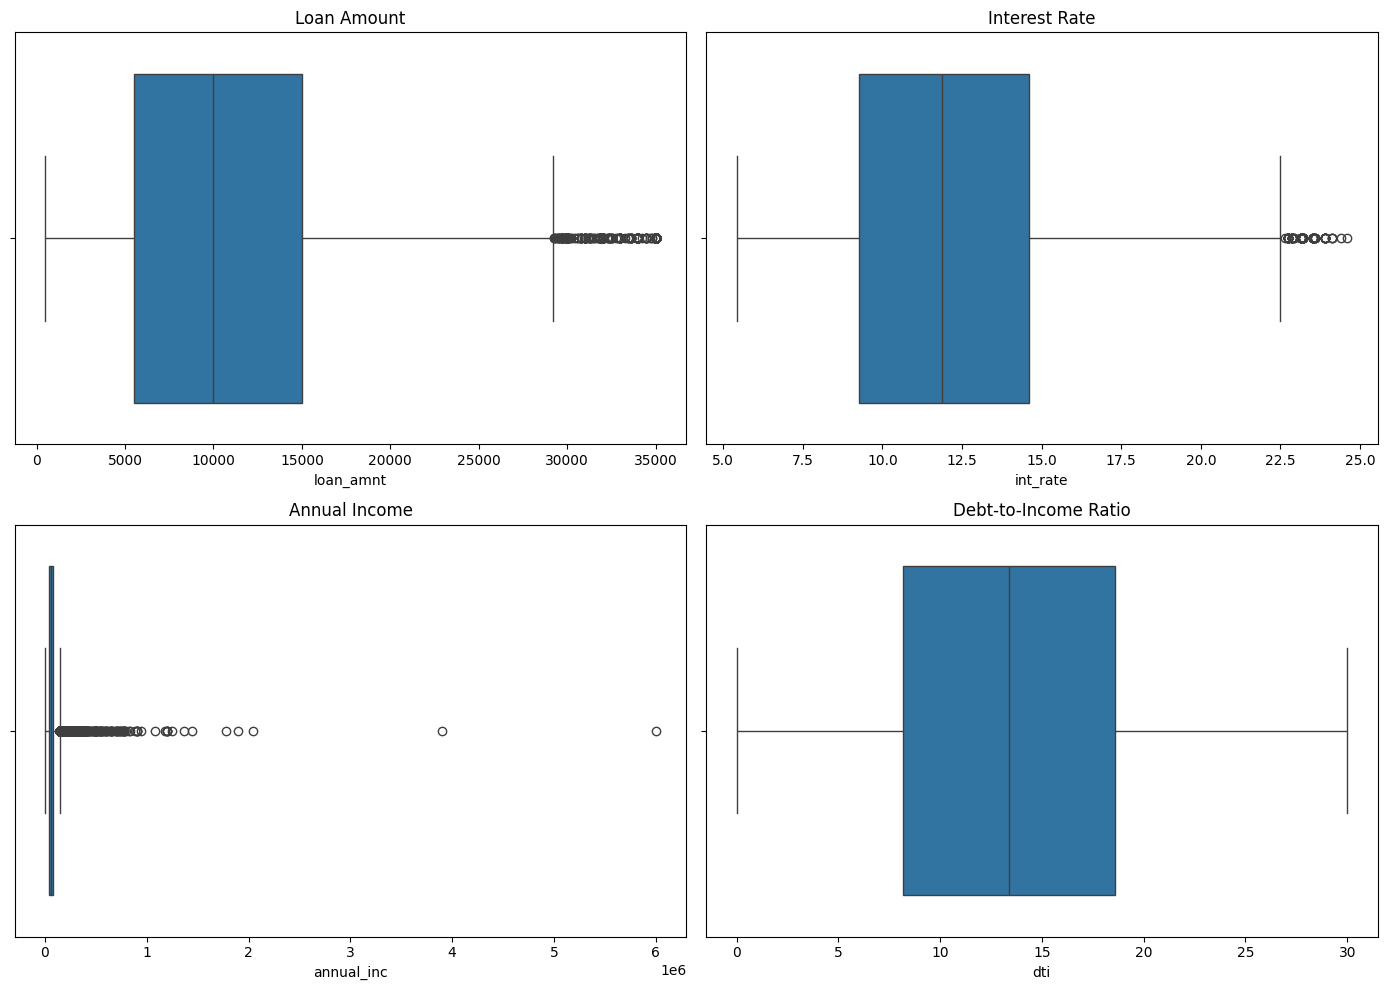

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loan Amount
sns.boxplot(x=loan_data_clean['loan_amnt'], ax=axes[0, 0])
axes[0, 0].set_title('Loan Amount')

# Interest Rate
sns.boxplot(x=loan_data_clean['int_rate'], ax=axes[0, 1])
axes[0, 1].set_title('Interest Rate')

# Annual Income
sns.boxplot(x=loan_data_clean['annual_inc'], ax=axes[1, 0])
axes[1, 0].set_title('Annual Income')

# Debt-to-Income Ratio
sns.boxplot(x=loan_data_clean['dti'], ax=axes[1, 1])
axes[1, 1].set_title('Debt-to-Income Ratio')


plt.tight_layout()
plt.show()


In [97]:
numeric_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns

Q1 = loan_data_clean[numeric_cols].quantile(0.25)
Q3 = loan_data_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

loan_amnt                      9500.00000
funded_amnt                    9600.00000
funded_amnt_inv                9400.00000
term                             24.00000
int_rate                          5.34000
installment                     263.76000
annual_inc                    41896.00000
dti                              10.43000
delinq_2yrs                       0.00000
inq_last_6mths                    1.00000
open_acc                          6.00000
pub_rec                           0.00000
revol_bal                     13355.00000
total_acc                        16.00000
out_prncp                         0.00000
out_prncp_inv                     0.00000
total_pymnt                   10957.50304
total_pymnt_inv               10686.50000
total_rec_prncp                9053.26000
total_rec_int                  2171.22000
total_rec_late_fee                0.00000
recoveries                        0.00000
collection_recovery_fee           0.00000
last_pymnt_amnt                307

 Remove extreme outliers (values outside of 1.5 * IQR range).

In [102]:
loan_data_clean = loan_data_clean[
    ~(
        (loan_data_clean[numeric_cols] < (Q1 - 1.5 * IQR)) |
        (loan_data_clean[numeric_cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19264 entries, 0 to 39714
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   19264 non-null  int64   
 1   funded_amnt                 19264 non-null  int64   
 2   funded_amnt_inv             19264 non-null  float64 
 3   term                        19264 non-null  int64   
 4   int_rate                    19264 non-null  float64 
 5   installment                 19264 non-null  float64 
 6   grade                       19264 non-null  category
 7   sub_grade                   19264 non-null  object  
 8   home_ownership              19264 non-null  object  
 9   annual_inc                  19264 non-null  float64 
 10  verification_status         19264 non-null  object  
 11  issue_d                     19264 non-null  object  
 12  loan_status                 19264 non-null  category
 13  pymnt_plan           

Handleing remaining missing values

In [103]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

revol_util             26
last_pymnt_d            9
title                   6
last_credit_pull_d      1
loan_amnt               0
total_rec_late_fee      0
initial_list_status     0
out_prncp               0
out_prncp_inv           0
total_pymnt             0
dtype: int64

In [104]:
# For categorical columns (object types), fill missing values with the mode
categorical_cols = loan_data_clean.select_dtypes(include=['object', 'category']).columns
loan_data_clean[categorical_cols] = loan_data_clean[categorical_cols].fillna(loan_data_clean[categorical_cols].mode().iloc[0])


In [105]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

loan_amnt              0
funded_amnt            0
total_acc              0
initial_list_status    0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
dtype: int64

In [106]:
# For numeric columns (float64 and int64 types), fill missing values with the median
# numeric_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns
# loan_data_clean[numeric_cols] = loan_data_clean[numeric_cols].fillna(loan_data_clean[numeric_cols].median())


# WIP

In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = './loan.csv'
loan_data = pd.read_csv(file_path)

/var/folders/kk/xx0ydj0576xgclh1nd3hdlbr0000gn/T/ipykernel_87886/1341194358.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Here are some of the key columns that appear in the data:
- id: Unique identifier for each loan.
- member_id: Unique identifier for the borrower.
- loan_amnt: The loan amount requested by the borrower.
- funded_amnt: The actual loan amount funded by the lender.
- term: The loan term (e.g., 36 months, 60 months).
- int_rate: The interest rate on the loan.
- installment: The monthly payment amount.
- grade: Credit grade assigned to the loan (e.g., A, B, C).
- sub_grade: More detailed credit grade (e.g., B2, C5).
- num_tl_90g_dpd_24m: The number of trade lines with a 90+ days delinquency in the past 24 months.
- pub_rec_bankruptcies: Number of public record bankruptcies.

In [4]:
data_dict_path = 'Data_Dictionary.xlsx'
data_dictionary = pd.read_excel(data_dict_path)

In [6]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
